In [15]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

In [2]:
dataDir='..'
dataType='val2017'
# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [4]:
annFile = 'test.json'
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
shark_0 human_1 human_2

COCO supercategories: 
human shark


In [43]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['shark_1']);
catIds
imgIds = coco.getImgIds(catIds=catIds);
# imgIds
# imgIds = coco.getImgIds(imgIds = [0])
# imgIds
img = coco.loadImgs(imgIds[0])
img

[{'id': 0,
  'file_name': 'shark_frames/20200805_OneSharkSUPSurfers/20200805_OneSharkSUPSurfers-0001.jpg'}]

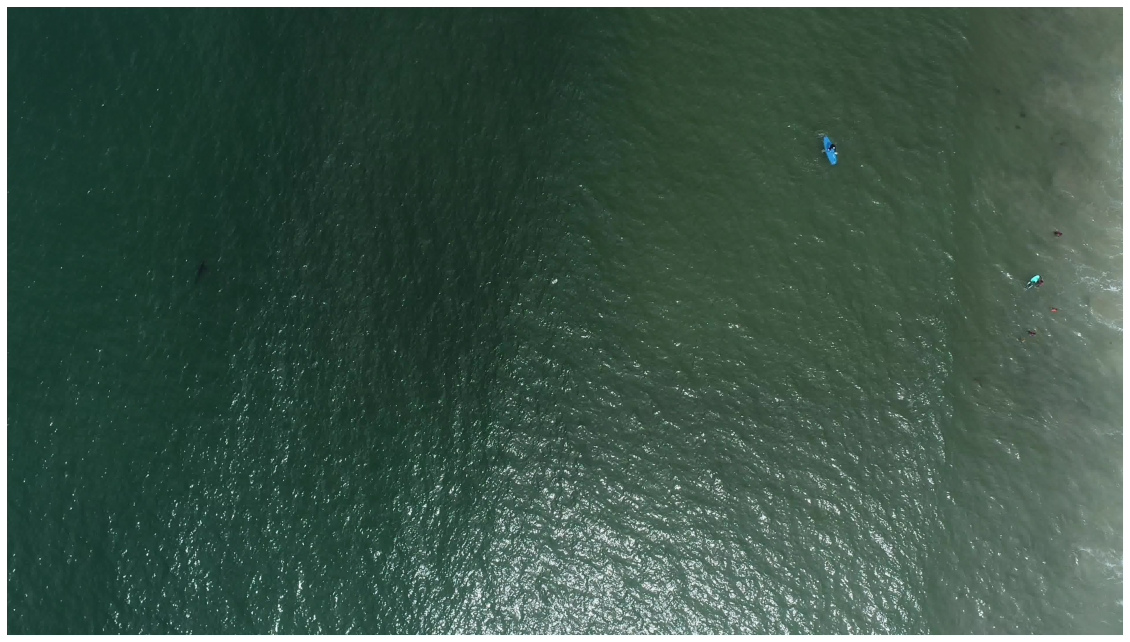

In [39]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [44]:
coco.anns

{0: {'id': 0,
  'image_id': 1651.3486853630634,
  'category_id': 2,
  'bbox': [1554.19, 1016.895, 93.757, 104.574],
  'area': 9804.544518},
 1: {'id': 1,
  'image_id': 1653.9860480547504,
  'category_id': 2,
  'bbox': [1842.671, 494.023, 86.544, 93.757],
  'area': 8114.105808},
 2: {'id': 2,
  'image_id': 977.7722479123402,
  'category_id': 2,
  'bbox': [1922.003, 594.992, 137.029, 57.696],
  'area': 7906.025183999999}}

[]

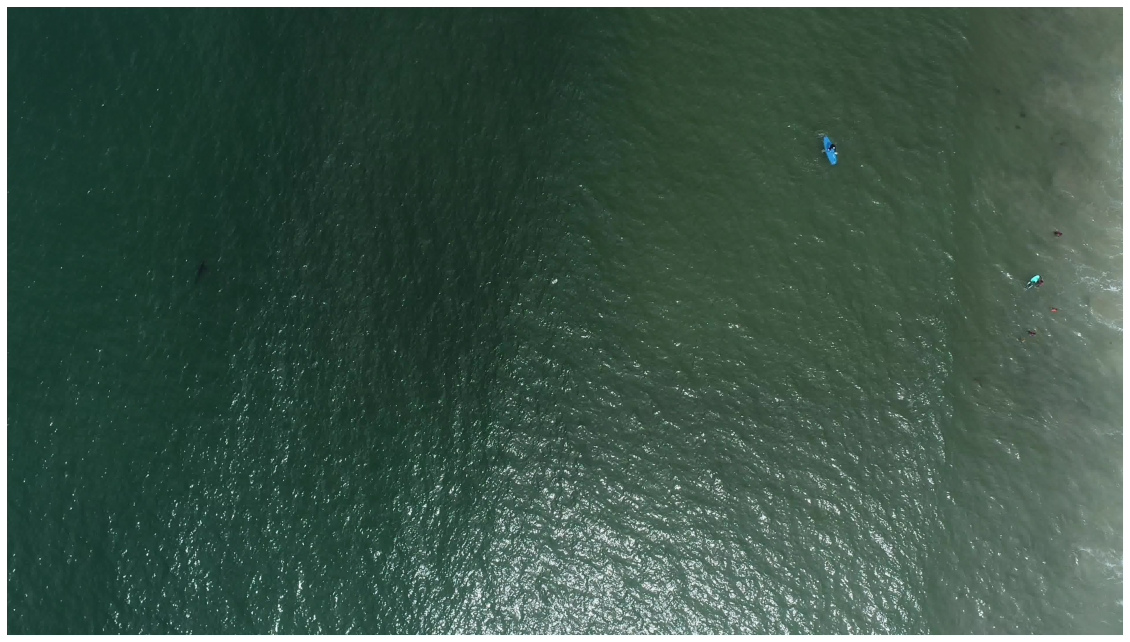

In [41]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
# annIds

In [8]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


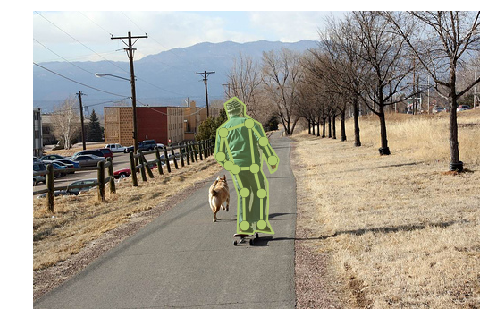

In [9]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [10]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


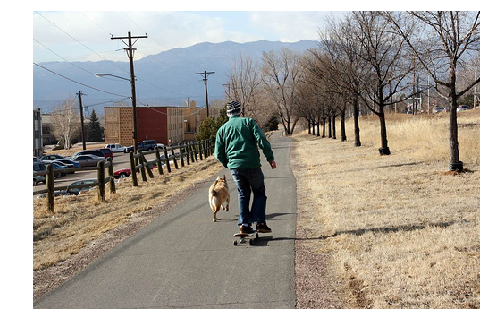

In [11]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()